###### The latest version of this IPython notebook is available at [http://github.com/jckantor/ESTM60203](http://github.com/jckantor/ESTM60203)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License (CC BY-NC-SA 4.0)](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Log-optimal Growth and the Kelly Criterion

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the Kelly criterion and other phenomena associated with log-optimal growth.

### Initializations

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random

## What are the Issues in Managing for Optimal Growth?

Consider a continuing 'investment opportunity' for which, at each stage, an invested dollar will yield either two dollars with probability $p$ or nothing with probability $1-p$. You can think of this as a gambling game if you like, or as sequence of business investment decisions.

<img src="files/img/Kelly_Criterion_Fig1.png" style = "width:150px">

Let $W_k$ be the wealth after $k$ stages in this sequence of decisions. At each stage $k$ there will be an associated return $R_k$ so that

$$W_k = R_k W_{k-1}$$

Starting with a wealth $W_0$, after $k$ stages our wealth will be

$$W_k = R_kR_{k-1}\cdots R_2R_1W_0$$

Now let's consider a specific investment strategy. To avoid risking total loss of wealth in a single stage, we'll consider a strategy where we invest a fraction $\alpha$ of our remaining wealth, and retain a fraction $1-\alpha$ for future use. Under this strategy, the return $R_k$ is given by

$$R_k = \begin{cases} 1+\alpha & \mbox{with probability}\quad p \\ 1-\alpha & \mbox{with probability}\quad 1-p\end{cases}$$

How should we pick $\alpha$? A small value means that wealth will grow slowly.  A large value will risk more of our wealth in each trial.

## Why Maximizing Expected Wealth is a Bad Idea

At first glance, maximizing expected wealth seems like a reasonable investment objective. Suppose  after $k$ stages we have witnessed $u$ profitable outcomes (i.e., 'wins'), and $k-u$ outcomes showing a loss. The remaining wealth will be given by

$$W_k/W_0 = (1+\alpha)^u(1-\alpha)^{k-u}$$

The binomial distribution gives the probability of observing $u$ 'wins' in $k$ trials

$$Pr(u \mbox{ wins in } k \mbox{ trials}) = {k\choose{u}}p^u (1-p)^{k-u}$$

So the expected value of $W_k$ is given by

$$E[W_k/W_0] = \sum_{u=0}^{k} {k\choose{u}}p^u (1-p)^{k-u}(1+\alpha)^u(1-\alpha)^{k-u}$$

Next we plot $E[W_k/W_0]$ as a function of $\alpha$. If you run this notebook on your own server, you can adjust $p$ and $K$ to see the impact of changing parameters.

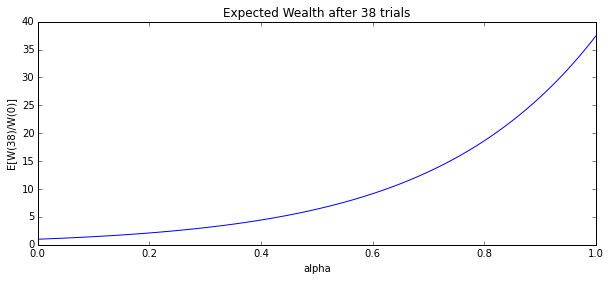

In [15]:
from scipy.misc import comb
from ipywidgets import interact

def sim(K = 40,p = 0.55):
    alpha = np.linspace(0,1,100)
    W = [sum([comb(K,u)*((p*(1+a))**u)*(((1-p)*(1-a))**(K-u)) \
              for u in range(0,K+1)]) for a in alpha]
    plt.figure(figsize=(10,4))
    plt.plot(alpha,W,'b')
    plt.xlabel('alpha')
    plt.ylabel('E[W({:d})/W(0)]'.format(K))
    plt.title('Expected Wealth after {:d} trials'.format(K))

interact(sim,K=(1,60),p=(0.4,0.6,0.01));

This simulation suggests that if each stage is, on average, a winning proposition with $p > 0.5$, then expected wealth after $K$ stages is maximized by setting $\alpha = 1$. This is a very risky strategy. 

To show how risky, the following cell simulates the behavior of this process for as a function of $\alpha$, $p$, and $K$. Try different values of $\alpha$ in the range from 0 to 1 to see what happens.

<function __main__.sim2>

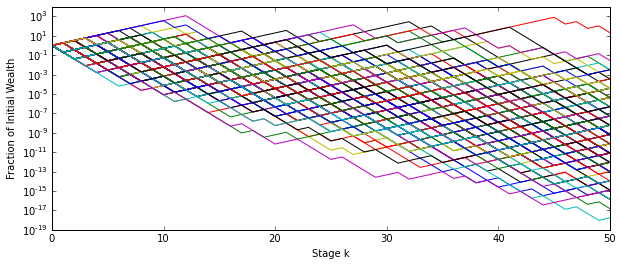

In [17]:
# Number of simulations to run
N = 200

def sim2(K = 50, p = 0.55, alpha = 0.8):
    plt.figure(figsize=(10,4))
    plt.xlabel('Stage k')
    plt.ylabel('Fraction of Initial Wealth');
    plt.xlim(0,K)
    plt.hold(True)
    for n in range(0,N):
        # Compute an array of future returns
        R = np.array([1-alpha + 2*alpha*float(random.random() <= p) for _ in range(0,K)])
        # Use returns to compute fraction of wealth that remains
        W = np.concatenate(([1.0],np.cumprod(R)))
        plt.semilogy(W) 
    plt.hold(False);

interact(sim2, K = (10,60), p = (0.4,0.6,0.001), alpha = (0.0,1.0,0.01))

Attempting to maximize wealth leads to a risky strategy where all wealth is put at risk at each stage hoping for a string of $k$ wins.  The very high rewards for this one outcome mask the fact that the most common outcome is to lose everything. If you're not convinced of this, go back and run the simulation a few more times for values of alpha in the range 0.8 to 1.0.  

If $\alpha =1$, the probability of still having money after $k$ stages is $(1-p)^k$.

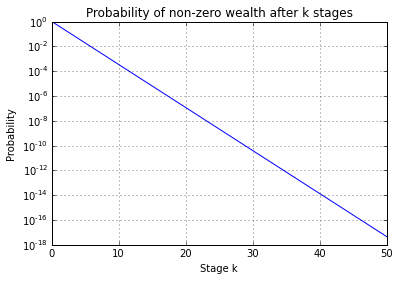

In [4]:
K = 50
p = 0.55

plt.semilogy(range(0,K+1), [(1-p)**k for k in range(0,K+1)])
plt.title('Probability of non-zero wealth after k stages')
plt.xlabel('Stage k')
plt.ylabel('Probability')
plt.grid();

The problem with maximizing expected wealth is that the objective ignores the associated financial risks. For the type of application being analyzed here, the possibility of a few very large outcomes are averaged with many others showing loss. While the average outcome make look fine, the most likely outcome is a very different result.

It's like the case of buying into a high stakes lottery. The average outcome is calculated by including the rare outcome of the winning ticket together millions of tickets where there is no payout whatsoever. Buying lottery tickets shouldn't be anyone's notion of a good business plan!

/Users/jeff/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jeff/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


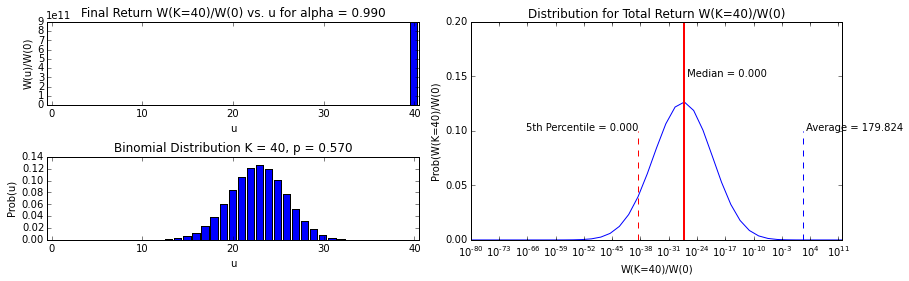

In [19]:
from scipy.misc import comb
from scipy.stats import binom
from IPython.html.widgets import interact

K = 40

def Wpdf(p=0.55, alpha=0.5):
    rv = binom(K,p)
    U = np.array(range(0,K+1))
    Pr = np.array([rv.pmf(u) for u in U])
    W = np.array([((1+alpha)**u)*(((1-alpha))**(K-u)) for u in U])
    plt.figure(figsize=(12,4))
    
    plt.subplot(2,2,1)
    plt.bar(U-0.5,W)
    plt.xlim(-0.5,K+0.5)
    plt.ylabel('W(u)/W(0)')
    plt.xlabel('u')
    plt.title('Final Return W(K={0})/W(0) vs. u for alpha = {1:.3f}'.format(K,alpha))
    
    plt.subplot(2,2,3)
    plt.bar(U-0.5,Pr)
    plt.xlim(-0.5,K+0.5)
    plt.ylabel('Prob(u)')
    plt.xlabel('u')
    plt.title('Binomial Distribution K = {0}, p = {1:.3f}'.format(K,p))
    
    plt.subplot(1,2,2)
    plt.semilogx(W,Pr,'b')
    plt.xlabel('W(K={0})/W(0)'.format(K))
    plt.ylabel('Prob(W(K={0})/W(0)'.format(K))
    plt.title('Distribution for Total Return W(K={0})/W(0)'.format(K))
    plt.ylim([0,0.2])
    Wbar = sum(Pr*W)
    WVaR = W[rv.ppf(0.05)]
    Wmed = 0.5*(W[rv.ppf(0.49)] + W[rv.ppf(0.51)])
    plt.hold(True)
    ylim = np.array(plt.ylim())
    plt.plot([WVaR,WVaR],0.5*ylim,'r--')
    plt.plot([Wbar,Wbar],0.5*ylim,'b--')
    plt.text(Wbar,0.5*ylim[1],' Average = {0:.3f}'.format(Wbar))
    plt.text(Wmed,0.75*ylim[1],' Median = {0:.3f}'.format(Wmed))
    plt.text(WVaR,0.5*ylim[1],'5th Percentile = {0:.3f}'.format(WVaR),ha='right')
    plt.plot([Wmed,Wmed],ylim,'r',lw=2)
    plt.hold(False)
    plt.tight_layout()

interact(Wpdf, p = (0.4,0.6,0.01), alpha = (0.01,0.99,0.01))

#### Exercise

1. Imagine you're playing a game of chance in which you expect to win 60% of the time. You expect to play 40 rounds in the game. The initial capital required to enter the game is high enough that losing half of your capital is something you could tolerate only 5% of the time. What fraction of your capital would you be willing to wager on each play of the game?

### Utility Functions

A utility function measures the 'utility' of holding some measure of wealth. The key concept is that the marginal utility of wealth decreases as wealth increases.  If you don't have much money, then finding \$20 on the sidewalk may have considerable utility since it may mean that you don't have to walk home from work.  On the other hand, if you're already quite wealthy, the incremental utility of a \$20 may not be as high.

A typical utility function is shown on the following chart.

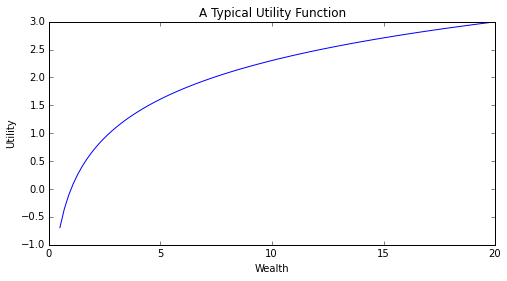

In [20]:
def U(x):
    return np.log(x)

def plotUtility(U):
    plt.figure(figsize=(8,4))
    x = np.linspace(0.5,20.0,100)
    plt.plot(x,U(x))
    plt.xlabel('Wealth')
    plt.ylabel('Utility')
    plt.title('A Typical Utility Function');
    
plotUtility(U)

To see how utilty functions allow us to incorporate risk into an objective function, consider the expected utility of a bet on a single flip of a coin. The bet pays \$5 if the coin comes up 'Heads', and \$15 if the coin comes up Tails. For a fair coin, the expected wealth is therefore

$$E[W] = 0.5 \times \$5 + 0.5\times\$15 = \$10$$

which is shown on the chart with the utility function.

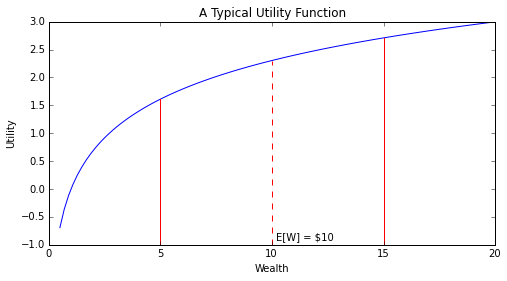

In [21]:
plotUtility(U)
ymin,ymax = plt.ylim()
plt.hold(True)
plt.plot([5,5],[ymin,U(5)],'r')
plt.plot([15,15],[ymin,U(15)],'r')
plt.plot([10,10],[ymin,U(10)],'r--')
plt.text(10.2,ymin+0.1,'E[W] = \$10');

Finding the expected utility, we can use the utilty function to solve for the 'certainty equivalent' value of the game. The certainty equivalent value is the amount of wealth that has the same utility as the expected utility of the game. 

$$U(CE) = E[U(W)]$$

Because the utilty function is concave, the certainty equivalent value is less than the expected value of the game. The difference between the two values is the degree to which we discount the value of the game due to it's uncertain nature.

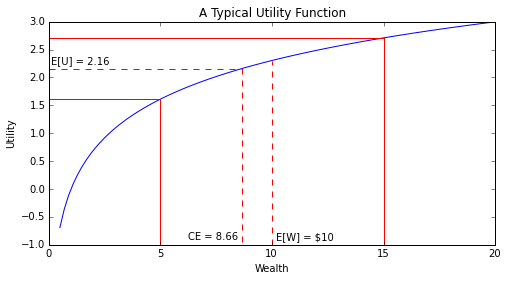

In [22]:
from scipy.optimize import brentq

plotUtility(U)
ymin,ymax = plt.ylim()
plt.hold(True)
plt.plot([5,5,0],[ymin,U(5),U(5)],'r')
plt.plot([15,15,0],[ymin,U(15),U(15)],'r')
plt.plot([10,10],[ymin,U(10)],'r--')
plt.text(10.2,ymin+0.1,'E[W] = \$10');

Uave = 0.5*(U(5)+U(15))
Ceq = brentq(lambda x: U(x)-Uave,5,15)
plt.plot([0,Ceq,Ceq],[Uave,Uave,ymin],'r--')
plt.text(0.1,Uave+0.1,'E[U] = {:.2f}'.format(Uave))
plt.text(Ceq-0.2,ymin+0.1,'CE = {:.2f}'.format(Ceq),ha='right');

### Maximizing Growth

To acheive a different result we need to consider optimization objective that incorporates a measure of risk. For example, the log ratio of current to starting wealth gives a relationship

$$\ln W_K/W_0 = \sum_{k=1}^K \ln R_{k}$$

Subjectively, the log ratio focuses relative rather than absolute growth which, for many investors, is a better indicator of investment objectives. Rather than risk all for an enormous but unlikely outcome, a strategy optimizing expected  relative growth will tradeoff risky strategies for more robust strategies demonstrating relative growth.  

Taking expectations

$$E[\ln W_K/W_0] = \sum_{k=1}^K E[\ln R_{k}] = K E[\ln R_{k}]$$

where

$$E[\ln R_{k}] = p\ln(1+\alpha) + (1-p)\ln(1-\alpha)$$

With simple calculus we can show that maximizing $E[\ln W_K/W_0]$ requires

$$\alpha = 2p-1$$

which yields a growth rate per stage

$$m = E[\ln R_{k}] = \ln 2 + p\ln(p) + (1-p)\ln(1-p)$$



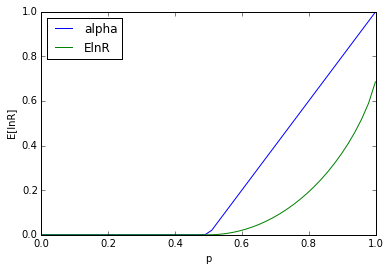

In [53]:
p = np.linspace(0.001,0.999)
alpha = np.array([max(0,2.0*q-1.0) for q in p])
plt.plot(p,alpha)
m = np.multiply(p,np.log(1.0+alpha)) + np.multiply(1.0-p,np.log(1.0-alpha))
plt.plot(p,m)

plt.xlabel('p')
plt.ylabel('E[lnR]')
plt.legend(['alpha','ElnR'],loc='upper left')

## Kelly's Criterion: Maximizing Growth for a Game with Arbitrary Odds

<img src="files/img/Kelly_Criterion_Fig2.png" style = "width:150px">

$$E[\ln R_{k
}] = p\ln(1+ b\alpha) + (1-p)\ln(1-\alpha)$$

Solving for $\alpha$

$$\alpha = \frac{p(b+1)-1}{b}$$

## Volatility Pumping

<img src="files/img/Kelly_Criterion_Volatility_Pumping.png" style = "height:120px">


Expected return = 0.004586


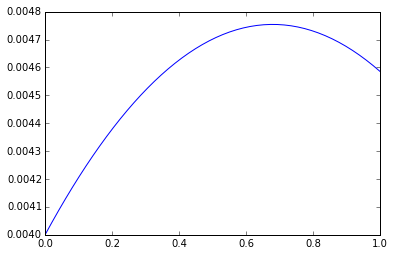

In [71]:
# payoffs for two states
u = 1.059
d = 1/u
p = 0.54

rf = 0.004

K = 100

ElnR = p*np.log(u) + (1-p)*np.log(d)
print "Expected return = {:0.5}".format(ElnR)


Z = np.array([float(random.random() <= p) for _ in range(0,K)])
R = d + (u-d)*Z
S = np.cumprod(np.concatenate(([1],R)))


ElnR = lambda alpha: p*np.log(alpha*u +(1-alpha)*np.exp(rf)) + \
    (1-p)*np.log(alpha*d + (1-alpha)*np.exp(rf))

a = np.linspace(0,1)

plt.plot(a,map(ElnR,a))

0.5


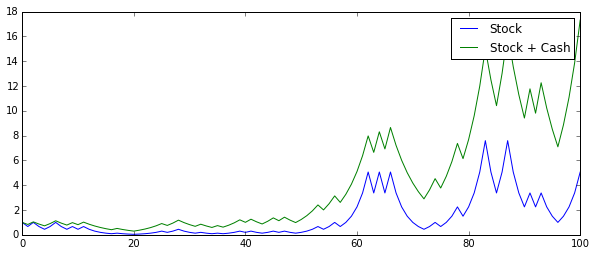

In [11]:
from scipy.optimize import fminbound
alpha = fminbound(lambda(alpha): -ElnR(alpha),0,1)
print alpha

#plt.plot(alpha, ElnR(alpha),'r.',ms=10)

R = alpha*d + (1-alpha) + alpha*(u-d)*Z
S2 = np.cumprod(np.concatenate(([1],R)))

plt.figure(figsize=(10,4))
plt.plot(range(0,K+1),S,range(0,K+1),S2)
plt.legend(['Stock','Stock + Cash']);